In [1]:
import gspread
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_excel('Bảng lương XLHH T05.2023.xlsx','T05.2023')
df_1

,UserId,UserName,Họ tên,StationId,Kho,Cơ chế áp dụng,Tỉnh,Miền,Trạng Thái,Ngày bắt đầu làm việc,...,Phụ cấp tối thiểu mặc định,Phụ cấp tối thiểu,Phụ cấp tăng ca ngày thường và CN,Phụ cấp tăng ca ngày Lễ,Phụ cấp thử việc,Phụ cấp Lễ,Phụ cấp phép,Bồi hoàn tạm tính,Phạt thẻ tự động tạm tính,Tổng thu nhập tạm tính
0,121917,dungdt16,ĐẶNG THANH DŨNG,17837,LV - Củ Chi Liên Miền,LV-City,TP Hồ Chí Minh,TP Hồ Chí Minh,Hoạt động,2018-09-20,...,8.607143e+06,8.607143e+06,720000,0,0,540000,0,-134927,0,19129641
1,653237,andvp,ĐOÀN VĂN PHƯỚC AN,17853,LV - Gò Vấp Nội Miền,LV-City,TP Hồ Chí Minh,TP Hồ Chí Minh,Hoạt động,2022-06-10,...,8.466667e+06,8.466667e+06,1080000,360000,0,0,0,0,0,18256666
2,662305,hann40,NGUYỄN NGỌC HÀ,17837,LV - Củ Chi Liên Miền,LV-City,TP Hồ Chí Minh,TP Hồ Chí Minh,Hoạt động,2022-07-21,...,8.666667e+06,8.666667e+06,360000,0,0,540000,0,-113638,0,17799998
3,662065,liempt13,PHẠM THANH LIÊM,17837,LV - Củ Chi Liên Miền,LV-City,TP Hồ Chí Minh,TP Hồ Chí Minh,Hoạt động,2022-07-21,...,8.285714e+06,8.285714e+06,360000,360000,0,540000,180000,-171898,0,17718570
4,606950,thuancph,CHÂU PHẠM HUY THUẬN,17801,Quận 9,NV-Tinh,TP Hồ Chí Minh,TP Hồ Chí Minh,Hoạt động,2021-11-11,...,6.562500e+06,6.562500e+06,1440000,720000,0,540000,0,-28882,0,17700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,715470,duongtn24,TRẦN NAM DƯƠNG,22474,HVC Gò Vấp,LV-City,TP Hồ Chí Minh,TP Hồ Chí Minh,Hoạt động,2023-05-16,...,1.346154e+06,1.346154e+06,0,0,0,0,0,0,0,0
3310,715472,quancn5,CHÂU NHẬT QUAN,22474,HVC Gò Vấp,LV-City,TP Hồ Chí Minh,TP Hồ Chí Minh,Hoạt động,2023-05-16,...,1.346154e+06,1.346154e+06,0,0,0,0,0,0,0,0
3311,715633,nghiatt132,TRẦN TRỌNG NGHĨA,22474,HVC Gò Vấp,LV-City,TP Hồ Chí Minh,TP Hồ Chí Minh,Đã khóa,2023-05-17,...,8.076923e+05,8.076923e+05,0,0,0,0,0,0,0,0
3312,715634,phongtt135,TRẦN THÀNH PHONG,22474,HVC Gò Vấp,LV-City,TP Hồ Chí Minh,TP Hồ Chí Minh,Hoạt động,2023-05-17,...,8.076923e+05,8.076923e+05,0,0,0,0,0,0,0,0


In [27]:
df_4 = pd.read_excel('Bảng lương XLHH T05.2023.xlsx','T04.2023')
df_4

,UserId,UserName,Họ tên,StationId,Kho,Cơ chế áp dụng,Tỉnh,Miền,Trạng Thái,Ngày bắt đầu làm việc,...,Phụ cấp tối thiểu mặc định,Phụ cấp tối thiểu,Phụ cấp tăng ca ngày thường và CN,Phụ cấp tăng ca ngày Lễ,Phụ cấp thử việc,Phụ cấp Lễ,Phụ cấp phép,Bồi hoàn tạm tính,Phạt thẻ tự động tạm tính,Tổng thu nhập tạm tính
0,25465,toantv3,TRẦN VIẾT TOÀN,18509,LV - Đà Nẵng,NV-Tinh,Đà Nẵng,Miền Trung,Hoạt động,2017-12-22,...,6.000000e+06,6.000000e+06,0,0,0,0,0,0,0,14250000
1,36285,sonlm,LÊ MINH SƠN,1260,LV - Thanh Hóa,NV-Tinh,Thanh Hóa,Miền Bắc,Hoạt động,2018-03-02,...,6.407407e+06,6.407407e+06,0,0,0,0,0,-6667,0,10016665
2,43185,congktv,TRẦN VĂN CÔNG,18113,LV - Vinh 1,NV-Tinh,Nghệ An,Miền Bắc,Hoạt động,2018-04-05,...,6.500000e+06,6.500000e+06,308148,0,0,0,0,-10078,0,12508148
3,43641,phuckdv,ĐINH VĂN PHÚC,657,LV - Phù Lỗ,LV-City,Hà Nội,Hà Nội,Hoạt động,2018-03-05,...,3.759259e+06,3.759259e+06,0,0,0,0,0,-764917,0,1772222
4,47033,nghiaknt,NGUYỄN TUẤN NGHĨA,1256,LV - Hải Phòng,NV-Tinh,Hải Phòng,Miền Bắc,Hoạt động,2018-04-10,...,6.500000e+06,6.500000e+06,1040000,0,0,0,0,-566036,0,14015000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,712559,hiennv152,NGUYỄN VĂN HIỀN,17853,LV - Gò Vấp Nội Miền,LV-City,TP Hồ Chí Minh,TP Hồ Chí Minh,Đã khóa,2023-04-18,...,2.592593e+05,2.592593e+05,0,0,0,0,0,0,0,259259
3522,712564,khangnd79,NGUYỄN DUY KHANG,1381,LV - Cần Thơ,NV-Tinh,Hậu Giang,Miền Nam,Đã khóa,2023-04-18,...,5.555556e+05,5.555556e+05,0,0,0,0,0,0,0,555555
3523,712573,sytt6,TRẦN TIẾN SỸ,18113,LV - Vinh 1,NV-Tinh,Nghệ An,Miền Bắc,Hoạt động,2023-04-18,...,2.407407e+05,2.407407e+05,0,0,0,0,0,0,0,240740
3524,712665,quangtt46,TRẦN THANH QUANG,17801,Quận 9,NV-Tinh,TP Hồ Chí Minh,TP Hồ Chí Minh,Hoạt động,2023-04-19,...,2.592593e+05,2.592593e+05,0,0,0,0,0,0,0,259259


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3314 entries, 0 to 3313
Data columns (total 71 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UserId                             3314 non-null   int64  
 1   UserName                           3314 non-null   object 
 2   Họ tên                             3314 non-null   object 
 3   StationId                          3314 non-null   int64  
 4   Kho                                3314 non-null   object 
 5   Cơ chế áp dụng                     3314 non-null   object 
 6   Tỉnh                               3314 non-null   object 
 7   Miền                               3314 non-null   object 
 8   Trạng Thái                         3314 non-null   object 
 9   Ngày bắt đầu làm việc              3314 non-null   object 
 10  Ngày hợp đồng có hiệu lực          3314 non-null   object 
 11  Bộ Phận                            3314 non-null   objec

In [37]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 68 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UserId                             3526 non-null   int64  
 1   UserName                           3526 non-null   object 
 2   Họ tên                             3526 non-null   object 
 3   StationId                          3526 non-null   int64  
 4   Kho                                3526 non-null   object 
 5   Cơ chế áp dụng                     3526 non-null   object 
 6   Tỉnh                               3526 non-null   object 
 7   Miền                               3526 non-null   object 
 8   Trạng Thái                         3526 non-null   object 
 9   Ngày bắt đầu làm việc              3526 non-null   object 
 10  Ngày hợp đồng có hiệu lực          3526 non-null   object 
 11  Bộ Phận                            3526 non-null   objec

1. Mức lượng trung bình của nhân viên theo từng khu vực


In [4]:
avg_salary_by_region = df_1.groupby('Tỉnh')['Tổng thu nhập tạm tính'].mean().to_dict()
# Định dạng giá trị trung bình của mức lương theo từng khu vực thành số kiểu tiền triệu
for region, avg_salary in avg_salary_by_region.items():
    avg_salary_by_region[region] = '{:,.2f}'.format(avg_salary / 1e6)



In [5]:
# Chuyển từ điển thành DataFrame
df_2 = pd.DataFrame.from_dict(avg_salary_by_region, orient='index', columns=['Mức lương trung bình'])
# df_2.sort_values(by =df_2['Mức lương trung bình'], ascending=False )

In [36]:
avg_salary_5 = df_1['Tổng thu nhập tạm tính'].mean() 
avg_salary_5
avg_salary_4 = df_4['Tổng thu nhập tạm tính'].mean() 
avg_salary_4
avg_salary = pd.DataFrame({
    'Tháng': ['Tháng 4','Tháng 5'],
    'Lương Trung Bình': [avg_salary_4/1e6,avg_salary_5/1e6]
})
avg_salary

,Tháng,Lương Trung Bình
0,Tháng 4,11.163645
1,Tháng 5,10.090407


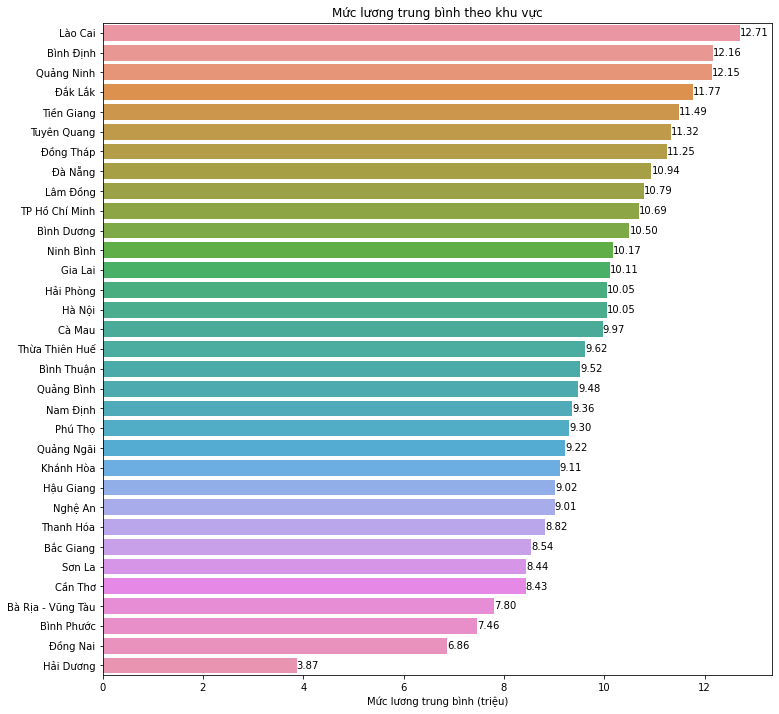

In [6]:
df_2['Mức lương trung bình'] = pd.to_numeric(df_2['Mức lương trung bình'], errors='coerce')
df_2 = df_2.sort_values(by='Mức lương trung bình', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 12))
sns.barplot(x=df_2['Mức lương trung bình'], y=df_2.index, order=df_2.index)

# Đặt giá trị của mỗi cột lên trên cột đó
for i in range(len(df_2)):
    plt.annotate(format(df_2['Mức lương trung bình'][i], '.2f'), 
                 xy=(df_2['Mức lương trung bình'][i], i), 
                 ha='left', 
                 va='center', 
                 color='black')

plt.title('Mức lương trung bình theo khu vực')
plt.xlabel('Mức lương trung bình (triệu)')
plt.show()

2. % của từng loại phụ cấp trong tổng phụ cấp


In [7]:
allowance_total = (df_1['Phụ cấp cấp bậc'].sum() + df_1['Phụ cấp quản lý'].sum() + df_1['Phụ cấp ca đêm'].sum() +
df_1['Phụ Cấp đơn hàng'].sum() + df_1['Phụ cấp kiện'].sum() + df_1['Phụ cấp KPI'].sum() + df_1['Phụ cấp tối thiểu mặc định'].sum()
+ df_1['Phụ cấp tối thiểu'].sum() + df_1['Phụ cấp tăng ca ngày thường và CN'].sum()  + df_1['Phụ cấp tăng ca ngày Lễ'].sum() +
df_1['Phụ cấp thử việc'].sum() + df_1['Phụ cấp Lễ'].sum() +  df_1['Phụ cấp phép'].sum())

allowance_total

104119453067.7881

In [8]:
allowance = {
    'allowance_cap_bac' : df_1['Phụ cấp cấp bậc'].sum()*100/allowance_total,
    'allowance_quanly' : df_1['Phụ cấp quản lý'].sum()*100/allowance_total,
    'allowance_ca_dem' : df_1['Phụ cấp ca đêm'].sum()*100/allowance_total,
    'allowance_don_hang': df_1['Phụ Cấp đơn hàng'].sum()*100/allowance_total,
    'allowance_kien' : df_1['Phụ cấp kiện'].sum()*100/allowance_total,
    'allowance_KPI' : df_1['Phụ cấp KPI'].sum()*100/allowance_total, 
    'allowance_toi_thieu_mac_dinh' : df_1['Phụ cấp tối thiểu mặc định'].sum()*100/allowance_total,
    'allowance_toi_thieu' : df_1['Phụ cấp tối thiểu'].sum()*100/allowance_total,
    'allowance_ngay_thuong_CN' : df_1['Phụ cấp tăng ca ngày thường và CN'].sum()*100/allowance_total,  
    'allowance_ca_ngay_le' : df_1['Phụ cấp tăng ca ngày Lễ'].sum()*100/allowance_total,
    'allowance_thu_viec': df_1['Phụ cấp thử việc'].sum()*100/allowance_total,
    'allowance_le' : df_1['Phụ cấp Lễ'].sum()*100/allowance_total,
    'allowance_phep' : df_1['Phụ cấp phép'].sum()*100/allowance_total
    
}

allowance

{'allowance_cap_bac': 0.11340076567932773,
 'allowance_quanly': 0.0,
 'allowance_ca_dem': 2.4768885371698643,
 'allowance_don_hang': 9.009263930624751,
 'allowance_kien': 18.337198995436097,
 'allowance_KPI': 29.930378286403663,
 'allowance_toi_thieu_mac_dinh': 19.03428131823678,
 'allowance_toi_thieu': 19.03428131823678,
 'allowance_ngay_thuong_CN': 0.472428528490012,
 'allowance_ca_ngay_le': 0.5877143818663738,
 'allowance_thu_viec': 0.0,
 'allowance_le': 0.9031021315371338,
 'allowance_phep': 0.10106180631922079}

In [9]:
allowance = pd.DataFrame(list(allowance.items()), columns=['allowance_name', 'allowance_value'])
allowance_sorted= allowance.sort_values(by='allowance_value', ascending= False)
allowance_sorted

,allowance_name,allowance_value
5,allowance_KPI,29.930378
6,allowance_toi_thieu_mac_dinh,19.034281
7,allowance_toi_thieu,19.034281
4,allowance_kien,18.337199
3,allowance_don_hang,9.009264
2,allowance_ca_dem,2.476889
11,allowance_le,0.903102
9,allowance_ca_ngay_le,0.587714
8,allowance_ngay_thuong_CN,0.472429
0,allowance_cap_bac,0.113401


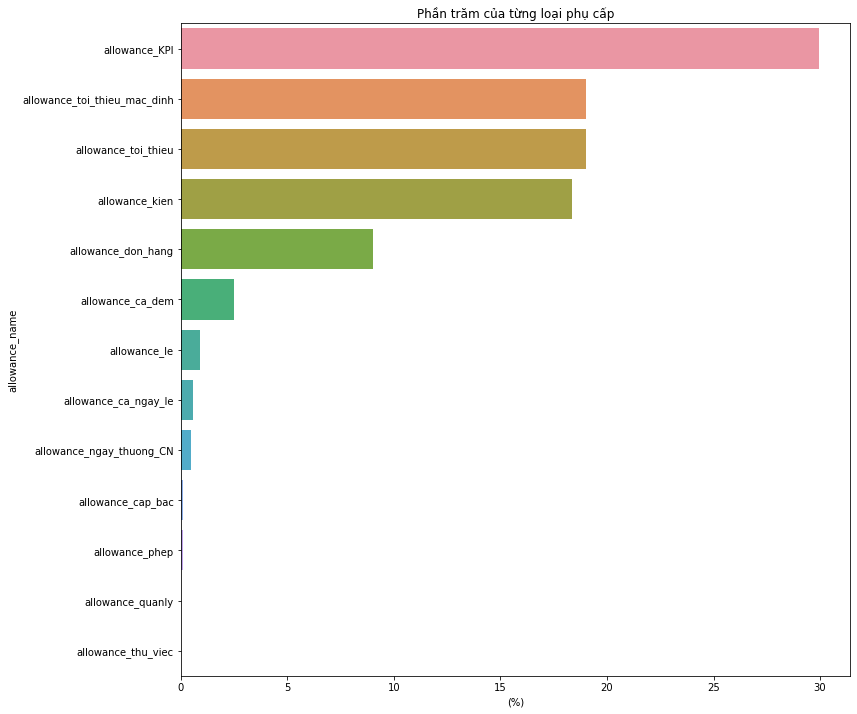

In [38]:
plt.figure(figsize=(12, 12))
sns.barplot(x=allowance_sorted['allowance_value'], y=allowance_sorted['allowance_name'])
plt.title('Phần trăm của từng loại phụ cấp')
plt.xlabel('(%)')
plt.show()

3. Tỷ lệ thưởng đạt được nhiều nhất trong tháng


In [11]:
thuong = {
    'can_nang_don_hang_tich_luy' : df_1['Thưởng Cân nặng ĐH tích lũy'].sum(),
    'can_nang_don_hang_tich_luy_raw' : df_1['Thưởng Cân nặng ĐH tích lũy RAW'].sum(),
    'kien_tich_luy' : df_1['Thưởng Cân nặng Kiện tích lũy'].sum(),
    'can_nang_kien_tich_luy_raw' : df_1['Thưởng Cân nặng Kiện tích lũy RAW'].sum(),
    'don_hang' : df_1['Thưởng Đơn hàng'].sum(),
    'kien' : df_1['Thưởng Kiện'].sum(),
    'can_nang_don_hang' : df_1['Thưởng cân nặng Đơn hàng'].sum(),
    'can_nang_kien' : df_1['Thưởng cân nặng Kiện'].sum()
    
    
    
    
}
df_thuong = pd.DataFrame(list(thuong.items()),columns=['loai_thuong','thuong_value']).sort_values(by= 'thuong_value', ascending= False)
df_thuong


,loai_thuong,thuong_value
2,kien_tich_luy,1.714478e+08
3,can_nang_kien_tich_luy_raw,1.666923e+08
7,can_nang_kien,2.121669e+07
0,can_nang_don_hang_tich_luy,1.018617e+07
1,can_nang_don_hang_tich_luy_raw,9.888728e+06
4,don_hang,7.807605e+06
5,kien,2.366302e+06
6,can_nang_don_hang,1.118983e+06


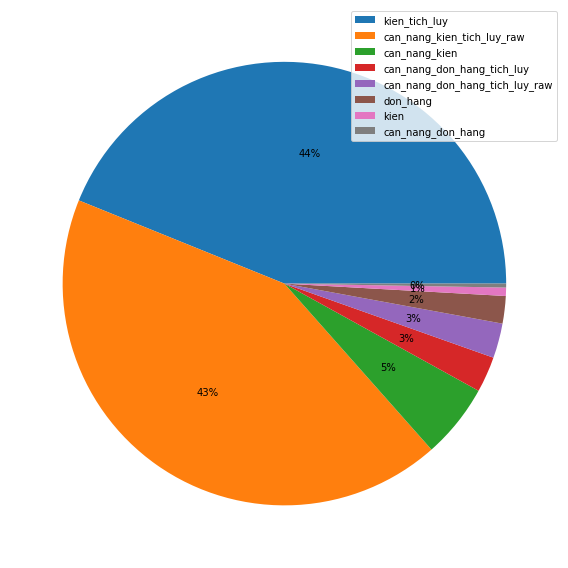

In [12]:
plt.figure(figsize=(8,8))
plt.pie(df_thuong['thuong_value'],autopct='%.0f%%', labeldistance=0.5)
plt.legend(df_thuong['loai_thuong'])
plt.tight_layout()
plt.show()

4. Tỷ lệ lỗi bị phạt hay gặp phải nhất

In [13]:
phat = {
    'phat_don_hang' : df_1['Phạt Đơn hàng'].sum(),
    'phat_kien' : df_1['Phạt Kiện'].sum(),
    'phat_can_nang_don_hang' : df_1['Phạt cân nặng Đơn hàng'].sum(), 
    'phat_can_nang_kien' : df_1['Phạt cân nặng Kiện'].sum(),
    'phat_the' : df_1['Phạt thẻ tự động tạm tính'].sum()
}

df_phat = pd.DataFrame(list(phat.items()),columns=['loai_phat','tong_phat'])
df_phat['tong_phat'] = df_phat['tong_phat'].astype(float).apply(lambda x: abs(x))
df_phat['loai_phat'] = df_phat['loai_phat'].astype(str)
df_phat

,loai_phat,tong_phat
0,phat_don_hang,930175.55
1,phat_kien,121180.77
2,phat_can_nang_don_hang,167829.82
3,phat_can_nang_kien,995153.48
4,phat_the,0.00


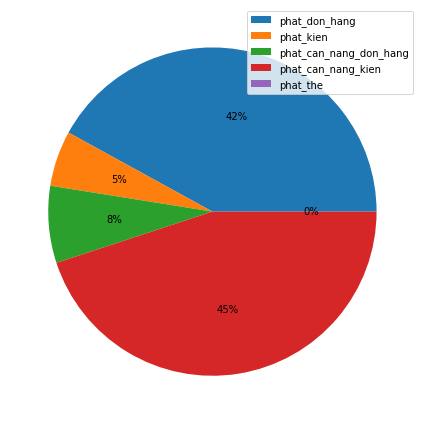

In [14]:
plt.figure(figsize=(6,6))
plt.pie(df_phat['tong_phat'],autopct='%.0f%%', labeldistance=0.5)
plt.legend(df_phat['loai_phat'])
plt.tight_layout()
plt.show()

4. Có bao nhiêu nhân viên bị phạt trong tháng 4 và tháng 5?

In [16]:
df_nv_phat_5 = df_1.loc[(df_1['Phạt Đơn hàng']<0)|(df_1['Phạt Kiện'] < 0)|(df_1['Phạt cân nặng Đơn hàng']<0)|(df_1['Phạt cân nặng Kiện']<0)
                                                                                                           |(df_1['Phạt thẻ tự động tạm tính']<0)]
num_empolyee_5 = len(df_nv_phat_5.index)
ratio_phat_5 = num_empolyee_5*100/len(df_1.index)

df_nv_phat_4 = df_4.loc[(df_4['Phạt Đơn hàng']<0)|(df_4['Phạt Kiện'] < 0)|(df_4['Phạt cân nặng Đơn hàng']<0)|(df_4['Phạt cân nặng Kiện']<0)
                                                                                                           |(df_4['Phạt thẻ tự động tạm tính']<0)]
num_empolyee_4 = len(df_nv_phat_4.index)
ratio_phat_4 = num_empolyee_4*100/len(df_4.index)

ratio_phat = {
    'tháng 5':ratio_phat_5,
    'tháng 4': ratio_phat_4
}
ratio_phat_df = pd.DataFrame(list(ratio_phat.items()),columns=['Tháng','Tỉ lệ bị phạt'])
ratio_phat_df

,Tháng,Tỉ lệ bị phạt
0,tháng 5,68.406759
1,tháng 4,53.771980


Tỷ lệ nhân viên bị phạt trong tháng 4 và tháng 5 là một vấn đề cần được quan tâm và giải quyết trong công ty, đặc biệt khi các chỉ số phạt liên quan đến quá trình xử lý hàng hóa của công ty. Những nguyên nhân chính dẫn đến việc nhân viên bị phạt có thể liên quan đến chất lượng sản phẩm, việc không tuân thủ quy trình và quy định, thiếu kinh nghiệm và đào tạo, và áp lực công việc.

Để giải quyết vấn đề này, công ty có thể áp dụng nhiều giải pháp khác nhau, bao gồm đào tạo và hỗ trợ nhân viên, giảm thiểu áp lực công việc, đánh giá lại quy trình và quy định của công ty để đảm bảo sự chính xác và đầy đủ trong quá trình xử lý hàng hóa, và tăng cường hệ thống giám sát và phản hồi để hỗ trợ nhân viên. Ngoài ra, công ty cũng có thể cải thiện môi trường làm việc để tạo sự thoải mái cho nhân viên và giúp họ làm việc hiệu quả hơn.

Việc giảm tỉ lệ nhân viên bị phạt không chỉ giúp tăng chất lượng sản phẩm và dịch vụ của công ty, mà còn tăng cường uy tín và hình ảnh của công ty, thu hút khách hàng và đối tác, và tăng cường sự cạnh tranh trên thị trường. Bằng cách áp dụng các giải pháp cụ thể để giải quyết vấn đề này, công ty có thể nâng cao hiệu quả làm việc của nhân viên, đồng thời tạo ra giá trị cho khách hàng và đối tác.

5. Tổng số tiền phụ cấp đã trả cho nhân viên xử lý hàng hóa trong tháng 4 và tháng 5

In [17]:
phu_cap = {
    'cap_bac' : df_1['Phụ cấp cấp bậc'].sum()*100/allowance_total,
    'quanly' : df_1['Phụ cấp quản lý'].sum()*100/allowance_total,
    'ca_dem' : df_1['Phụ cấp ca đêm'].sum()*100/allowance_total,
    'don_hang': df_1['Phụ Cấp đơn hàng'].sum()*100/allowance_total,
    'kien' : df_1['Phụ cấp kiện'].sum()*100/allowance_total,
    'KPI' : df_1['Phụ cấp KPI'].sum()*100/allowance_total, 
    'toi_thieu_mac_dinh' : df_1['Phụ cấp tối thiểu mặc định'].sum()*100/allowance_total,
    'toi_thieu' : df_1['Phụ cấp tối thiểu'].sum()*100/allowance_total,
    'ngay_thuong_CN' : df_1['Phụ cấp tăng ca ngày thường và CN'].sum()*100/allowance_total,  
    'ca_ngay_le' : df_1['Phụ cấp tăng ca ngày Lễ'].sum()*100/allowance_total,
    'thu_viec': df_1['Phụ cấp thử việc'].sum()*100/allowance_total,
    'le' : df_1['Phụ cấp Lễ'].sum()*100/allowance_total,
    'phep' : df_1['Phụ cấp phép'].sum()*100/allowance_total
    
}

allowance

,allowance_name,allowance_value
0,allowance_cap_bac,0.113401
1,allowance_quanly,0.000000
2,allowance_ca_dem,2.476889
3,allowance_don_hang,9.009264
4,allowance_kien,18.337199
5,allowance_KPI,29.930378
6,allowance_toi_thieu_mac_dinh,19.034281
7,allowance_toi_thieu,19.034281
8,allowance_ngay_thuong_CN,0.472429
9,allowance_ca_ngay_le,0.587714


In [18]:
df_phu_cap_5 = df_1.loc[(df_1['Phụ cấp cấp bậc']>0)|(df_1['Phụ cấp quản lý']>0)|(df_1['Phụ cấp ca đêm']>0)|(df_1['Phụ Cấp đơn hàng']>0
                                                                                                         )|(df_1['Phụ cấp kiện']>0)|
                    (df_1['Phụ cấp KPI']>0)| (df_1['Phụ cấp tối thiểu mặc định']>0)|(df_1['Phụ cấp tối thiểu']>0)|(df_1['Phụ cấp tăng ca ngày thường và CN']>0
                                                                                                                  )|(df_1['Phụ cấp tăng ca ngày Lễ']>0)|(df_1['Phụ cấp thử việc']>0)
                     |(df_1['Phụ cấp Lễ']>0)|(df_1['Phụ cấp phép']>0)]
ratio_phu_cap_5 = len(df_phu_cap_5.index)*100/ len(df_1.index)

df_phu_cap_4 = df_4.loc[(df_4['Phụ cấp cấp bậc']>0)|(df_4['Phụ cấp quản lý']>0)|(df_4['Phụ cấp ca đêm']>0)|(df_4['Phụ Cấp đơn hàng']>0
                                                                                                         )|(df_4['Phụ cấp kiện']>0)|
                    (df_4['Phụ cấp KPI']>0)| (df_4['Phụ cấp tối thiểu mặc định']>0)|(df_4['Phụ cấp tối thiểu']>0)|(df_4['Phụ cấp tăng ca ngày thường và CN']>0
                                                                                                                  )|(df_4['Phụ cấp tăng ca ngày Lễ']>0)|(df_4['Phụ cấp thử việc']>0)
                     |(df_4['Phụ cấp Lễ']>0)|(df_4['Phụ cấp phép']>0)]
ratio_phu_cap_4 = len(df_phu_cap_4.index)*100/ len(df_4.index)


phu_cap_nv = {'Tháng 4': ratio_phu_cap_4,
              'Tháng 5': ratio_phu_cap_5
    
}
df_phu_cap_nv = pd.DataFrame(list(phu_cap_nv.items()), columns= ['Tháng','Tổng Phụ Cấp'])
df_phu_cap_nv

,Tháng,Tổng Phụ Cấp
0,Tháng 4,99.489507
1,Tháng 5,99.728425


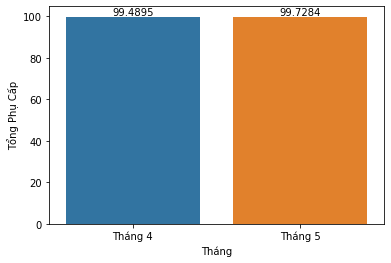

In [19]:
ax = sns.barplot(data=df_phu_cap_nv, x='Tháng',y='Tổng Phụ Cấp')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Tỷ lệ này cho thấy rằng số lượng nhân viên được hưởng phụ cấp trong tháng 4 và tháng 5 là rất cao, gần như tất cả nhân viên đều được hưởng phụ cấp và có xu hướng tăng nhẹ trong tháng 5. Điều này có thể cho thấy rằng công ty đang có chính sách hỗ trợ nhân viên tốt và đáp ứng được nhu cầu của nhân viên.

Tuy nhiên, nếu tỷ lệ này quá cao thì có thể cho thấy công ty đang chi quá nhiều tiền cho phụ cấp, dẫn đến tình trạng thất thải nhân viên không hiệu quả hoặc ảnh hưởng đến tài chính của công ty. Do đó, cần phải xem xét lại chính sách phụ cấp và tìm cách tối ưu hóa chi phí.

Ngoài ra, để đánh giá chính xác hơn về chính sách phụ cấp của công ty, cần phải xem xét thêm nhiều yếu tố khác như số lượng nhân viên, mức độ cạnh tranh trên thị trường lao động, các chính sách hỗ trợ khác của công ty, v.v.để có đánh giá chính xác nhất


6.Phân tích hiệu quả làm việc

In [20]:
df_1['efficiency'] = df_1['Tổng Công thực tế'] / df_1['Công Chuẩn Cá nhân']

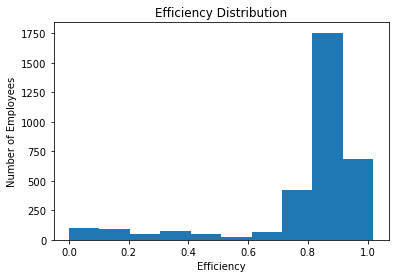

In [21]:
# Biểu đồ dạng histogram của hiệu suất làm việc
plt.hist(df_1['efficiency'])
plt.title('Efficiency Distribution')
plt.xlabel('Efficiency')
plt.ylabel('Number of Employees')
plt.show()

In [40]:
max_efficiency = df_1['efficiency'].max()
min_efficiency = df_1['efficiency'].min()

top_performer = df_1[df_1['efficiency'] == max_efficiency]
worst_performer = df_1[df_1['efficiency'] == min_efficiency]
worst_performer


,UserId,UserName,Họ tên,StationId,Kho,Cơ chế áp dụng,Tỉnh,Miền,Trạng Thái,Ngày bắt đầu làm việc,...,Phụ cấp tăng ca ngày thường và CN,Phụ cấp tăng ca ngày Lễ,Phụ cấp thử việc,Phụ cấp Lễ,Phụ cấp phép,Bồi hoàn tạm tính,Phạt thẻ tự động tạm tính,Tổng thu nhập tạm tính,efficiency,days_off_count
3294,650529,baonq102,NGUYỄN QUANG BẢO,17801,Quận 9,NV-Tinh,TP Hồ Chí Minh,TP Hồ Chí Minh,Đã khóa,2022-05-27,...,0,0,0,0,0,-44267,0,0,0.0,1
3295,672086,anth36,TRẦN HỒNG ÂN,17801,Quận 9,NV-Tinh,TP Hồ Chí Minh,TP Hồ Chí Minh,Đã khóa,2022-08-29,...,0,0,0,0,0,-44267,0,0,0.0,1
3296,674782,sanglt73,LÊ THANH SANG,17801,Quận 9,NV-Tinh,TP Hồ Chí Minh,TP Hồ Chí Minh,Đã khóa,2022-09-09,...,0,0,0,0,0,-44267,0,0,0.0,1
3298,701225,manhpv60,PHẠM VĂN MẠNH,657,LV - Phù Lỗ,LV-City,Hà Nội,Hà Nội,Đã khóa,2023-02-15,...,0,0,0,0,0,-38900,0,0,0.0,1
3302,708371,tailv52,LÊ VĂN TÀI,17853,LV - Gò Vấp Nội Miền,LV-City,TP Hồ Chí Minh,TP Hồ Chí Minh,Đã khóa,2023-03-22,...,0,0,0,0,0,0,0,0,0.0,0
3303,708699,datnht7,NGUYỄN HÀ THIÊN ĐẠT,17853,LV - Gò Vấp Nội Miền,LV-City,TP Hồ Chí Minh,TP Hồ Chí Minh,Đã khóa,2023-03-23,...,0,0,0,0,0,-169000,0,0,0.0,0
3304,708807,datpt189,PHAN THÀNH NHÂN,17853,LV - Gò Vấp Nội Miền,LV-City,TP Hồ Chí Minh,TP Hồ Chí Minh,Đã khóa,2023-03-24,...,0,0,0,0,0,0,0,0,0.0,0
3306,711080,hungdd48,ĐẶNG ĐÌNH HƯNG,5984,Kho Yên Nghĩa,NV-Tinh,Hà Nội,Hà Nội,Đã khóa,2023-04-06,...,0,0,0,0,0,-57800,0,0,0.0,1
3307,713829,khaihn6,HOÀNG NHẨN KHẢI,17801,Quận 9,NV-Tinh,TP Hồ Chí Minh,TP Hồ Chí Minh,Đã khóa,2023-04-28,...,0,0,0,0,0,0,0,0,0.0,1


In [41]:
mean_efficiency = df_1['efficiency'].mean()
top_employees = df_1[df_1['efficiency'] > mean_efficiency]
len(top_employees.index)

2637